# Garbage Detection Model 

In [74]:
# Import necessary libraries
import sys
sys.path.append('./')
import pandas as pd
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from resnets import ResNet50
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import joblib


In [75]:
# Paths to CSV files
train_csv = "./dataset/training.csv"
val_csv = "./dataset/validation.csv"

In [76]:
# Load CSV data
train_data = pd.read_csv(train_csv)
val_data = pd.read_csv(val_csv)


In [77]:
# 1. DATA EXPLORATION

In [78]:
# Display the first few rows of the dataset
print("Training Data Head:")
print(train_data.head())
print("\nValidation Data Head:")
print(val_data.head())

Training Data Head:
                                               image    label
0  https://farm66.staticflickr.com/65535/33978196...  garbage
1  https://farm66.staticflickr.com/65535/47803331...  garbage
2  https://farm66.staticflickr.com/65535/40888872...  garbage
3  https://farm66.staticflickr.com/65535/47803331...  garbage
4  https://farm66.staticflickr.com/65535/33978199...  garbage

Validation Data Head:
                                               image    label
0  https://farm66.staticflickr.com/65535/49042143...  garbage
1  https://farm66.staticflickr.com/65535/49042858...  garbage
2  https://farm66.staticflickr.com/65535/49042858...  garbage
3  https://farm66.staticflickr.com/65535/49042142...  garbage
4  https://farm66.staticflickr.com/65535/49042142...  garbage


In [79]:
# Check dataset info
print("\nTraining Data Info:")
print(train_data.info())
print("\nValidation Data Info:")
print(val_data.info())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2445 non-null   object
 1   label   2445 non-null   object
dtypes: object(2)
memory usage: 38.3+ KB
None

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   270 non-null    object
 1   label   270 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB
None


In [80]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Validation Data:")
print(val_data.isnull().sum())


Missing Values in Training Data:
image    0
label    0
dtype: int64

Missing Values in Validation Data:
image    0
label    0
dtype: int64


In [54]:
# Check for duplicate entries
print("\nDuplicate Entries in Training Data:", train_data.duplicated().sum())
print("Duplicate Entries in Validation Data:", val_data.duplicated().sum())


Duplicate Entries in Training Data: 0
Duplicate Entries in Validation Data: 0


In [55]:
# Define the ResNet50 feature extraction class 
class ResNet50:
    def __init__(self):
        pass

    def conv2d(self, x, filters, kernel_size, strides):
        # convolution operation
        return x
    
    def batch_norm(self, x):
        # batch normalization
        return x
    
    def relu(self, x):
        # ReLU activation
        return np.maximum(x, 0)

    def forward(self, x):
        # forward pass (assuming a shallow architecture)
        x = self.conv2d(x, filters=64, kernel_size=(3, 3), strides=(1, 1))
        x = self.batch_norm(x)
        x = self.relu(x)
        
        return x  # Returning feature map as the output


In [56]:
# Function to load and preprocess an image from a URL
def preprocess_image(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = np.array(img.resize((224, 224)))  # Resize image to 224x224 for ResNet50 input
    return img

In [57]:
# Extract features for a dataset (using the ResNet50 model)
def extract_features(df):
    resnet = ResNet50()  # Initialize the custom ResNet50 model
    features = []
    labels = []
    
    for _, row in df.iterrows():
        # Access image and label columns
        img_url = row['image']
        label = row['label']
        
        img = preprocess_image(img_url)  # Process image from the URL
        feature = resnet.forward(img).flatten()  # Extract features (flattened)
        
        features.append(feature)
        labels.append(label)
    
    return np.array(features), np.array(labels)

In [58]:
# Load CSV files containing image paths and labels
train_df = train_data
val_df = val_data


In [59]:
# Check column names of the training and validation DataFrames
print(train_df.columns)
print(val_df.columns)


Index(['image', 'label'], dtype='object')
Index(['image', 'label'], dtype='object')


In [60]:
# Remove any leading/trailing spaces in column names
train_df.columns = train_df.columns.str.strip()
val_df.columns = val_df.columns.str.strip()

# Now, check the column names again
print(train_df.columns)
print(val_df.columns)


Index(['image', 'label'], dtype='object')
Index(['image', 'label'], dtype='object')


In [61]:
# Extract features for the training and validation sets
X_train, y_train = extract_features(train_df)
X_val, y_val = extract_features(val_df)

In [62]:
print("done")

done


In [63]:
# Train a Random Forest classifier on the extracted features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
print("done")

done


In [65]:
# Make predictions on the validation set
y_pred = clf.predict(X_val)

In [66]:
print("done")

done


In [67]:
# Calculate Accuracy, F1 Score, Recall, Precision

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='binary', pos_label='garbage')
recall = recall_score(y_val, y_pred, average='binary', pos_label='garbage')
precision = precision_score(y_val, y_pred, average='binary', pos_label='garbage')

In [68]:
# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.71
F1 Score: 0.82
Recall: 0.90
Precision: 0.75


In [69]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[27  3]
 [ 9  3]]


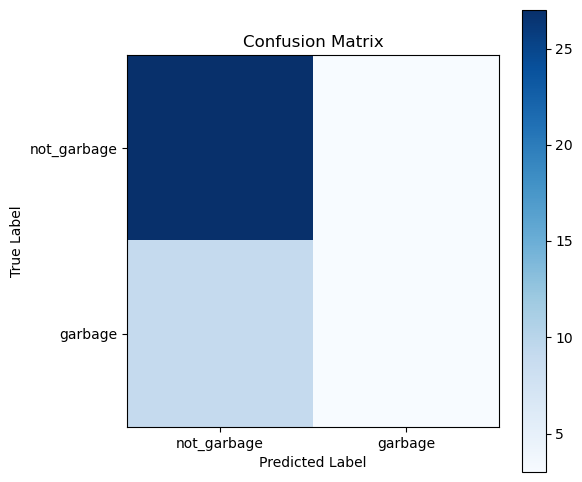

In [70]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['not_garbage', 'garbage'])
plt.yticks([0, 1], ['not_garbage', 'garbage'])
plt.show()

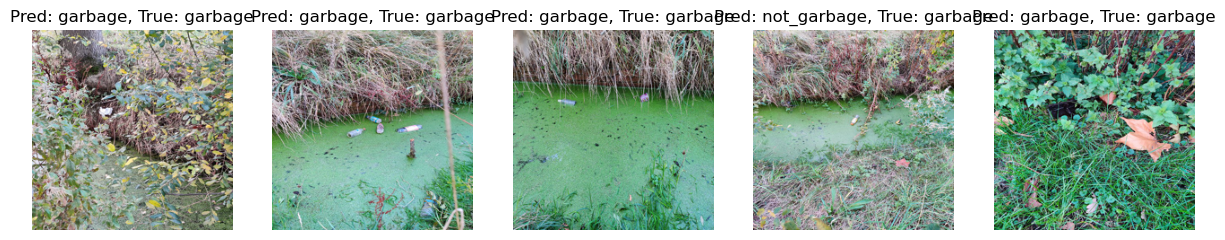

In [71]:
# Visualize some predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i, ax in enumerate(axes):
    ax.axis('off')
    img_url = val_df.iloc[i]['image']
    img = preprocess_image(img_url)
    ax.imshow(img)
    ax.set_title(f"Pred: {y_pred[i]}, True: {y_val[i]}")
plt.show()

In [72]:
# Save the trained model
joblib.dump(clf, 'garbage_detection_model.pkl')

['garbage_detection_model.pkl']

In [73]:
# Model Deployment using StreamLit